In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ingrese el tamaño de N = 100
Su h = 0.01
El tamaño de la matriz es (100, 100)
Escoja el orden de la norma {1,2,inf}: inf
Error de la aproximación con h = 0.01 y considerando la norma infinito es 0.027059880180191218


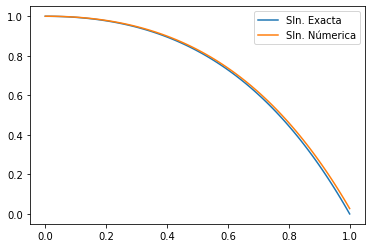

In [ ]:
def f(x):
    return (1+2*x-x**2)*np.exp(x)

def sln(x):
    return (1-x)*np.exp(x)

def diferenciaCentrada(N, a= 0, b= 1):
    h = (b-a)/N
    t = np.linspace(a, b, N)

    #Condiciones iniciales
    v0 = 1
    vn = 0

    fj = f(t)
    for i in range(len(fj)):
        if i == 0:
            fj[0] = (h**2)*fj[i] + v0
        else:
            fj[i] = (h**2)*fj[i] + vn

    A = np.zeros((N, N))

    for i in range(N):
        A[i,i] = 2 + (h**2)*t[i]
    for i in range(N):
        for j in range(N):
            if j == i + 1:
                A[i,j] = -1
            elif j == i - 1:
                A[i,j] = -1

    v = np.dot(np.linalg.inv(A), fj)
    return A, v, t, h

def errorNormaInfinito(h, orden, a= 0, b= 1):
    N = int((b-a)/h)
    t = np.linspace(a,b,N)
    exacta = sln(t)
    A, appr, x, h = diferenciaCentrada(N)
    return np.linalg.norm(exacta-appr, ord=orden)

N = int(input('Ingrese el tamaño de N = '))
A, v, t, h = diferenciaCentrada(N)
#Grafica de la solución y la aproximación
print(f'Su h = {h}')
print(f'El tamaño de la matriz es {A.shape}')
orden = input('Escoja el orden de la norma {1,2,inf}: ')

if orden == 'inf':
    orden = np.inf
else:
    orden = int(orden)

print(f'Error de la aproximación con h = {h} y considerando la norma infinito es {errorNormaInfinito(h, orden)}')
plt.plot(t,sln(t), label='Sln. Exacta')
plt.plot(t,v, label='Sln. Númerica')
plt.legend()
plt.show()